In [1]:
import numpy as np
from numpy.random import default_rng
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import math

## Initial Estimator Results

In [2]:
# load results
n_initial_est_1000 = pd.read_csv("../simulation/R500_initial/initial_est_n1000.csv")
n_initial_iter_1000 = pd.read_csv("../simulation/R500_initial/initial_iter_n1000.csv")
n_initial_est_2000 = pd.read_csv("../simulation/R500_initial/initial_est_n2000.csv")
n_initial_iter_2000 = pd.read_csv("../simulation/R500_initial/initial_iter_n2000.csv")
n_initial_est_5000 = pd.read_csv("../simulation/R500_initial/initial_est_n5000.csv")
n_initial_iter_5000 = pd.read_csv("../simulation/R500_initial/initial_iter_n5000.csv")

In [5]:
K = 5; q = 8;
# True Parameters
sigma = 1; theta = [3,1.5,0,0,2,0,0,0]; gamma = list(range(-4,3*K-4,3));
pi = [0.15,0.2,0.3,0.25,0.1]

In [6]:
# Compute evaluations
pi_1000 = n_initial_est_1000.iloc[:,0:K]
error_pi_1000 = pd.DataFrame(pi_1000 - pi)
error_pi_sse_1000 = (np.sum(error_pi_1000**2,axis = 1))**0.5
gamma_1000 = n_initial_est_1000.iloc[:,K:2*K]
error_gamma_1000 = pd.DataFrame(gamma_1000 - gamma)
error_gamma_sse_1000 = (np.sum(error_gamma_1000**2,axis = 1))**0.5
theta_1000 = n_initial_est_1000.iloc[:,2*K:2*K+q]
error_theta_1000 = pd.DataFrame(theta_1000 - theta)
error_theta_sse_1000 = (np.sum(error_theta_1000**2,axis = 1))**0.5
sigma_1000 = n_initial_est_1000.iloc[:,-1]
error_sigma_1000 = pd.DataFrame(sigma_1000**2-sigma**2)
error_sigma_sse_1000 = (error_sigma_1000**2)**0.5

pi_2000 = n_initial_est_2000.iloc[:,0:K]
error_pi_2000 = pd.DataFrame(pi_2000 - pi)
error_pi_sse_2000 = (np.sum(error_pi_2000**2,axis = 1))**0.5
gamma_2000 = n_initial_est_2000.iloc[:,K:2*K]
error_gamma_2000 = pd.DataFrame(gamma_2000 - gamma)
error_gamma_sse_2000 = (np.sum(error_gamma_2000**2,axis = 1))**0.5
theta_2000 = n_initial_est_2000.iloc[:,2*K:2*K+q]
error_theta_2000 = pd.DataFrame(theta_2000 - theta)
error_theta_sse_2000 = (np.sum(error_theta_2000**2,axis = 1))**0.5
sigma_2000 = n_initial_est_2000.iloc[:,-1]
error_sigma_2000 = pd.DataFrame(sigma_2000**2-sigma**2)
error_sigma_sse_2000 = (error_sigma_2000**2)**0.5

pi_5000 = n_initial_est_5000.iloc[:,0:K]
error_pi_5000 = pd.DataFrame(pi_5000 - pi)
error_pi_sse_5000 = (np.sum(error_pi_5000**2,axis = 1))**0.5
gamma_5000 = n_initial_est_5000.iloc[:,K:2*K]
error_gamma_5000 = pd.DataFrame(gamma_5000 - gamma)
error_gamma_sse_5000 = (np.sum(error_gamma_5000**2,axis = 1))**0.5
theta_5000 = n_initial_est_5000.iloc[:,2*K:2*K+q]
error_theta_5000 = pd.DataFrame(theta_5000 - theta)
error_theta_sse_5000 = (np.sum(error_theta_5000**2,axis = 1))**0.5
sigma_5000 = n_initial_est_5000.iloc[:,-1]
error_sigma_5000 = pd.DataFrame(sigma_5000**2-sigma**2)
error_sigma_sse_5000 = (error_sigma_5000**2)**0.5

In [7]:
print('gamma_err_5000', np.median(np.log(error_gamma_sse_5000)),'\n',
      'theta_err_5000', np.median(np.log(error_theta_sse_5000)),'\n',
      'pi_err_5000', np.median(np.log(error_pi_sse_5000)),'\n',
      'sigma_err_5000', np.median(np.log(error_sigma_sse_5000))
     )

gamma_err_5000 -2.2037875692566153 
 theta_err_5000 -2.3362011548071675 
 pi_err_5000 -4.246894389147629 
 sigma_err_5000 -3.7232136655578962


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


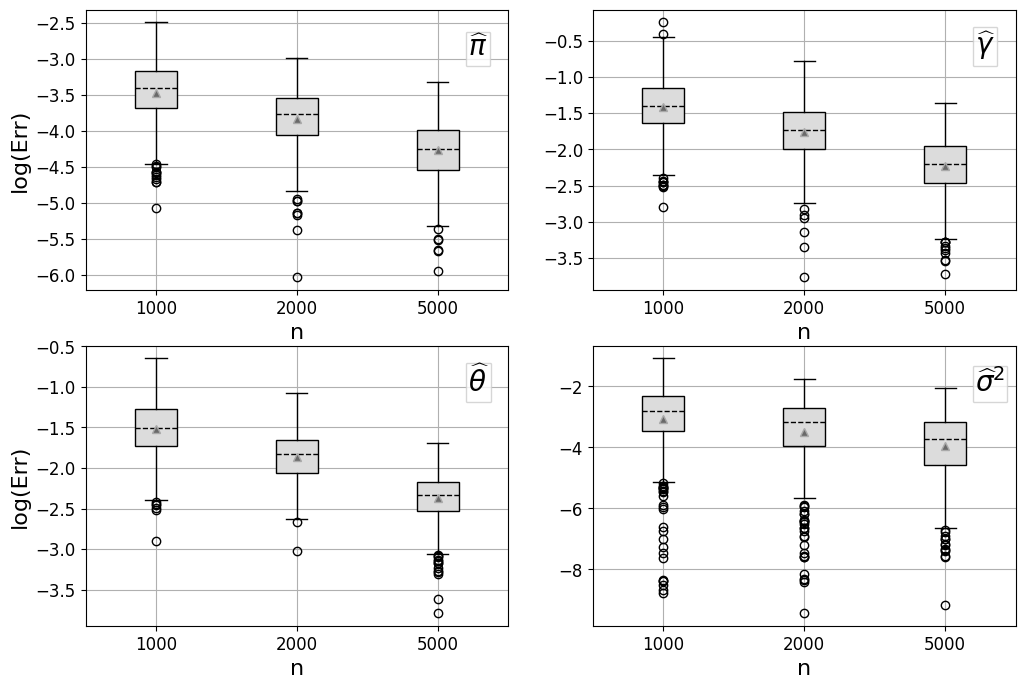

In [9]:
# Plot
plt.figure(figsize=(12,8))
plt.subplot(221)
ddp = np.array([np.log(error_pi_sse_1000).tolist(),np.log(error_pi_sse_2000).tolist(),
               np.log(error_pi_sse_5000).tolist()])
dfp = pd.DataFrame(ddp.T,columns=['1000','2000','5000'])
plt.legend(loc=(0.9,0.8),title=(r'$\widehat{\pi}$'), markerscale = 5, title_fontsize=20,fontsize=3)
plt.xlabel('n',fontsize=16)
plt.ylabel('log(Err)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fg = dfp.boxplot(sym = 'o',            
               vert = True,          
               patch_artist = True,  
               meanline = False,showmeans = True, 
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True, 
               notch = False,    
               return_type='dict')  
plt.grid(True) 

plt.subplot(222)
ddg = np.array([np.log(error_gamma_sse_1000).tolist(),np.log(error_gamma_sse_2000).tolist(),
               np.log(error_gamma_sse_5000).tolist()])
dfg = pd.DataFrame(ddg.T,columns=['1000','2000','5000'])
plt.legend(loc=(0.9,0.8),title=(r'$\widehat{\gamma}$'), markerscale = 5, title_fontsize=20,fontsize=3)
plt.xlabel('n',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fg = dfg.boxplot(sym = 'o',            
               vert = True,          
               patch_artist = True, 
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True, 
               notch = False,    
               return_type='dict') 
plt.grid(True) 

plt.subplot(223)
dd = np.array([np.log(error_theta_sse_1000).tolist(),np.log(error_theta_sse_2000).tolist(),
               np.log(error_theta_sse_5000).tolist()])
df = pd.DataFrame(dd.T,columns=['1000','2000','5000'])
plt.legend(loc=(0.9,0.8),title=(r'$\widehat{\theta}$'), markerscale = 5, title_fontsize=20,fontsize=3)
plt.xlabel('n',fontsize=16)
plt.ylabel('log(Err)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ft = df.boxplot(sym = 'o',            
               vert = True,         
               patch_artist = True, 
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True,  
               notch = False,    
               return_type='dict') 
plt.grid(True)

plt.subplot(224)
dds = np.array([np.log(error_sigma_sse_1000.iloc[:,0]),np.log(error_sigma_sse_2000.iloc[:,0]),
                np.log(error_sigma_sse_5000.iloc[:,0])])
dfs = pd.DataFrame(dds.T,columns=['1000','2000','5000'])
fs = dfs.boxplot(sym = 'o',            
               vert = True,          
               patch_artist = True,  
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True,  
               notch = False,   
               return_type='dict')  
plt.legend(loc=(0.9,0.8),title=(r'$\widehat{\sigma}^2$'), markerscale = 5, title_fontsize=20,fontsize=3)
plt.xlabel('n',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.savefig("Results/0305initial.pdf")
plt.show()

## Response Probability Results

In [12]:
# Load results and compute evaluations
B = 500
n = 1000; p = 1000;
rho_kj_1000_1000 = pd.read_csv("../simulation/new_R500_responce/rho_1000_1000.csv")
error_rho_1000_1000 = np.zeros((B,p))
RMSE_rho_1000_1000 = np.zeros(B)
for b in range(B):
    rho_est_1000_1000 = pd.read_csv("../simulation/new_R500_responce/n1000_p1000/rho_est_1000_1000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_1000_1000 - rho_kj_1000_1000)
    error_rho_1000_1000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_1000_1000[b] = (np.sum(error_rho_1000_1000[b,:]**2)/p)**0.5 
RMax_rho_1000_1000 = np.zeros(B)
for b in range(B):
    RMax_rho_1000_1000[b] = np.max(error_rho_1000_1000[b,:])

    
n = 1000; p = 2000;
rho_kj_1000_2000 = pd.read_csv("../simulation/new_R500_responce/rho_1000_2000.csv")
error_rho_1000_2000 = np.zeros((B,p))
RMSE_rho_1000_2000 = np.zeros(B)
for b in range(B):
    rho_est_1000_2000 = pd.read_csv("../simulation/new_R500_responce/n1000_p2000/rho_est_1000_2000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_1000_2000 - rho_kj_1000_2000)
    error_rho_1000_2000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_1000_2000[b] = (np.sum(error_rho_1000_2000[b,:]**2)/p)**0.5 
RMax_rho_1000_2000 = np.zeros(B)
for b in range(B):
    RMax_rho_1000_2000[b] = np.max(error_rho_1000_2000[b,:])

    
n = 1000; p = 5000;
rho_kj_1000_5000 = pd.read_csv("../simulation/new_R500_responce/rho_1000_5000.csv")
error_rho_1000_5000 = np.zeros((B,p))
RMSE_rho_1000_5000 = np.zeros(B)
for b in range(B):
    rho_est_1000_5000 = pd.read_csv("../simulation/new_R500_responce/n1000_p5000/rho_est_1000_5000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_1000_5000 - rho_kj_1000_5000)
    error_rho_1000_5000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_1000_5000[b] = (np.sum(error_rho_1000_5000[b,:]**2)/p)**0.5 
RMax_rho_1000_5000 = np.zeros(B)
for b in range(B):
    RMax_rho_1000_5000[b] = np.max(error_rho_1000_5000[b,:])


n = 2000; p = 1000;
rho_kj_2000_1000 = pd.read_csv("../simulation/new_R500_responce/rho_2000_1000.csv")
error_rho_2000_1000 = np.zeros((B,p))
RMSE_rho_2000_1000 = np.zeros(B)
for b in range(B):
    rho_est_2000_1000 = pd.read_csv("../simulation/new_R500_responce/n2000_p1000/rho_est_2000_1000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_2000_1000 - rho_kj_2000_1000)
    error_rho_2000_1000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_2000_1000[b] = (np.sum(error_rho_2000_1000[b,:]**2)/p)**0.5 
RMax_rho_2000_1000 = np.zeros(B)
for b in range(B):
    RMax_rho_2000_1000[b] = np.max(error_rho_2000_1000[b,:])

n = 2000; p = 2000;
rho_kj_2000_2000 = pd.read_csv("../simulation/new_R500_responce/rho_2000_2000.csv")
error_rho_2000_2000 = np.zeros((B,p))
RMSE_rho_2000_2000 = np.zeros(B)
for b in range(B):
    rho_est_2000_2000 = pd.read_csv("../simulation/new_R500_responce/n2000_p2000/rho_est_2000_2000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_2000_2000 - rho_kj_2000_2000)
    error_rho_2000_2000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_2000_2000[b] = (np.sum(error_rho_2000_2000[b,:]**2)/p)**0.5 
RMax_rho_2000_2000 = np.zeros(B)
for b in range(B):
    RMax_rho_2000_2000[b] = np.max(error_rho_2000_2000[b,:])

n = 2000; p = 5000;
rho_kj_2000_5000 = pd.read_csv("../simulation/new_R500_responce/rho_2000_5000.csv")
error_rho_2000_5000 = np.zeros((B,p))
RMSE_rho_2000_5000 = np.zeros(B)
for b in range(B):
    rho_est_2000_5000 = pd.read_csv("../simulation/new_R500_responce/n2000_p5000/rho_est_2000_5000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_2000_5000 - rho_kj_2000_5000)
    error_rho_2000_5000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_2000_5000[b] = (np.sum(error_rho_2000_5000[b,:]**2)/p)**0.5 
RMax_rho_2000_5000 = np.zeros(B)
for b in range(B):
    RMax_rho_2000_5000[b] = np.max(error_rho_2000_5000[b,:])


n = 5000; p = 1000;
rho_kj_5000_1000 = pd.read_csv("../simulation/new_R500_responce/rho_5000_1000.csv")
error_rho_5000_1000 = np.zeros((B,p))
RMSE_rho_5000_1000 = np.zeros(B)
for b in range(B):
    rho_est_5000_1000 = pd.read_csv("../simulation/new_R500_responce/n5000_p1000/rho_est_5000_1000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_5000_1000 - rho_kj_5000_1000)
    error_rho_5000_1000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_5000_1000[b] = (np.sum(error_rho_5000_1000[b,:]**2)/p)**0.5 
RMax_rho_5000_1000 = np.zeros(B)
for b in range(B):
    RMax_rho_5000_1000[b] = np.max(error_rho_5000_1000[b,:])

    
n = 5000; p = 2000;
rho_kj_5000_2000 = pd.read_csv("../simulation/new_R500_responce/rho_5000_2000.csv")
error_rho_5000_2000 = np.zeros((B,p))
RMSE_rho_5000_2000 = np.zeros(B)
for b in range(B):
    rho_est_5000_2000 = pd.read_csv("../simulation/new_R500_responce/n5000_p2000/rho_est_5000_2000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_5000_2000 - rho_kj_5000_2000)
    error_rho_5000_2000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_5000_2000[b] = (np.sum(error_rho_5000_2000[b,:]**2)/p)**0.5 
RMax_rho_5000_2000 = np.zeros(B)
for b in range(B):
    RMax_rho_5000_2000[b] = np.max(error_rho_5000_2000[b,:])

    
n = 5000; p = 5000;
rho_kj_5000_5000 = pd.read_csv("../simulation/new_R500_responce/rho_5000_5000.csv")
error_rho_5000_5000 = np.zeros((B,p))
RMSE_rho_5000_5000 = np.zeros(B)
for b in range(B):
    rho_est_5000_5000 = pd.read_csv("../simulation/new_R500_responce/n5000_p5000/rho_est_5000_5000_"+str(b)+".csv")
    distance = pd.DataFrame(rho_est_5000_5000 - rho_kj_5000_5000)
    error_rho_5000_5000[b,:] = (np.sum(distance**2,axis = 0))**0.5
    RMSE_rho_5000_5000[b] = (np.sum(error_rho_5000_5000[b,:]**2)/p)**0.5 
RMax_rho_5000_5000 = np.zeros(B)
for b in range(B):
    RMax_rho_5000_5000[b] = np.max(error_rho_5000_5000[b,:])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


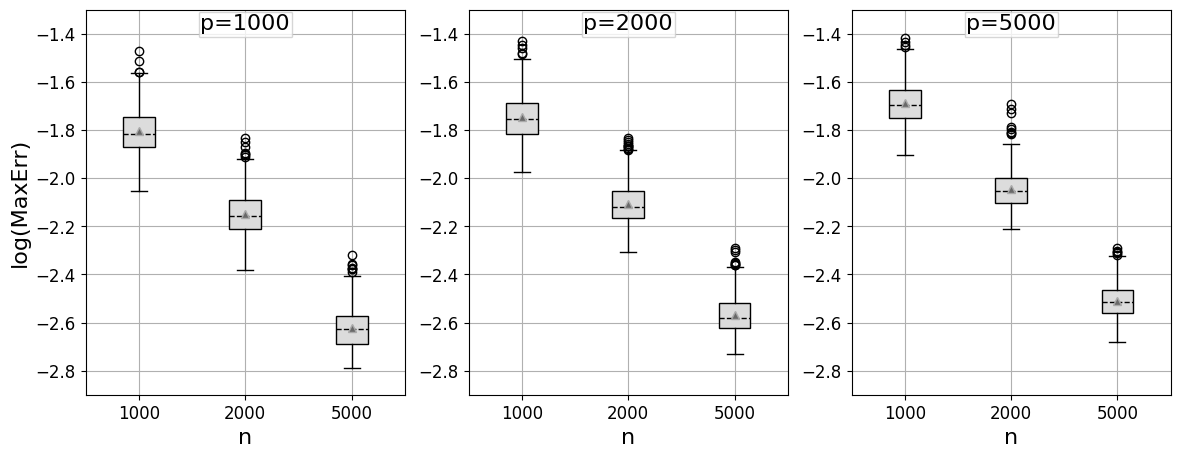

In [14]:
# Plot
plt.figure(figsize=(14,5))
plt.subplot(131)
ddp = np.array([np.log(RMax_rho_1000_1000).tolist(),np.log(RMax_rho_2000_1000).tolist(),
               np.log(RMax_rho_5000_1000).tolist()])
dfp = pd.DataFrame(ddp.T,columns=['1000','2000','5000'])
plt.legend(loc=9,title=('p=1000'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.xlabel('n',fontsize=16)
plt.ylim(-2.9, -1.3)
plt.ylabel('log(MaxErr)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fg = dfp.boxplot(sym = 'o',            
               vert = True,         
               patch_artist = True,  
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True,  
               notch = False,    
               return_type='dict')  
plt.grid(True) 

plt.subplot(132)
ddg = np.array([np.log(RMax_rho_1000_2000).tolist(),np.log(RMax_rho_2000_2000).tolist(),
               np.log(RMax_rho_5000_2000).tolist()])
dfg = pd.DataFrame(ddg.T,columns=['1000','2000','5000'])
plt.legend(loc=9,title=('p=2000'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.ylim(-2.9, -1.3)
plt.xlabel('n',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fg = dfg.boxplot(sym = 'o',            
               vert = True,         
               patch_artist = True,  
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True, 
               notch = False,    
               return_type='dict')  
plt.grid(True) 

plt.subplot(133)
dd = np.array([np.log(RMax_rho_1000_5000).tolist(),np.log(RMax_rho_2000_5000).tolist(),
               np.log(RMax_rho_5000_5000).tolist()])
df = pd.DataFrame(dd.T,columns=['1000','2000','5000'])
plt.legend(loc=9,title=('p=5000'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.ylim(-2.9, -1.3)
plt.xlabel('n',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ft = df.boxplot(sym = 'o',            
               vert = True,         
               patch_artist = True, 
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True,  
               notch = False,   
               return_type='dict')  
plt.grid(True)

plt.savefig("Results/0305pkj.pdf")
plt.show()

## Class Membership Identification

In [16]:
# Load estimation results
n = 1000; p = 100; 
a_ik_1000_100 = pd.read_csv("../simulation/R500_posterior/a_ik_1000_100.csv")
a_ik_matrix_1000_100 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_1000_100.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_1000_100[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_1000_100 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_1000_100[b,:,:] = pd.read_csv("../simulation/R500_posterior/n1000_p100/pi_est_1000_100_"+str(b)+".csv")
RMax_Err_pi_1000_100 = np.max(pi_ik_matrix_est_1000_100 - a_ik_matrix_1000_100, axis=(1,2))    


n = 1000; p = 200; 
a_ik_1000_200 = pd.read_csv("../simulation/R500_posterior/a_ik_1000_200.csv")
a_ik_matrix_1000_200 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_1000_200.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_1000_200[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_1000_200 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_1000_200[b,:,:] = pd.read_csv("../simulation/R500_posterior/n1000_p200/pi_est_1000_200_"+str(b)+".csv")
RMax_Err_pi_1000_200 = np.max(pi_ik_matrix_est_1000_200 - a_ik_matrix_1000_200, axis=(1,2))    


n = 1000; p = 500; 
a_ik_1000_500 = pd.read_csv("../simulation/R500_posterior/a_ik_1000_500.csv")
a_ik_matrix_1000_500 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_1000_500.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_1000_500[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_1000_500 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_1000_500[b,:,:] = pd.read_csv("../simulation/R500_posterior/n1000_p500/pi_est_1000_500_"+str(b)+".csv")
RMax_Err_pi_1000_500 = np.max(pi_ik_matrix_est_1000_500 - a_ik_matrix_1000_500, axis=(1,2))    
   

n = 2000; p = 100; 
a_ik_2000_100 = pd.read_csv("../simulation/R500_posterior/a_ik_2000_100.csv")
a_ik_matrix_2000_100 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_2000_100.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_2000_100[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_2000_100 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_2000_100[b,:,:] = pd.read_csv("../simulation/R500_posterior/n2000_p100/pi_est_2000_100_"+str(b)+".csv")
RMax_Err_pi_2000_100 = np.max(pi_ik_matrix_est_2000_100 - a_ik_matrix_2000_100, axis=(1,2))    


n = 2000; p = 200; 
a_ik_2000_200 = pd.read_csv("../simulation/R500_posterior/a_ik_2000_200.csv")
a_ik_matrix_2000_200 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_2000_200.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_2000_200[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_2000_200 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_2000_200[b,:,:] = pd.read_csv("../simulation/R500_posterior/n2000_p200/pi_est_2000_200_"+str(b)+".csv")
RMax_Err_pi_2000_200 = np.max(pi_ik_matrix_est_2000_200 - a_ik_matrix_2000_200, axis=(1,2))    


n = 2000; p = 500; 
a_ik_2000_500 = pd.read_csv("../simulation/R500_posterior/a_ik_2000_500.csv")
a_ik_matrix_2000_500 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_2000_500.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_2000_500[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_2000_500 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_2000_500[b,:,:] = pd.read_csv("../simulation/R500_posterior/n2000_p500/pi_est_2000_500_"+str(b)+".csv")
RMax_Err_pi_2000_500 = np.max(pi_ik_matrix_est_2000_500 - a_ik_matrix_2000_500, axis=(1,2))    


n = 5000; p = 100; 
a_ik_5000_100 = pd.read_csv("../simulation/R500_posterior/a_ik_5000_100.csv")
a_ik_matrix_5000_100 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_5000_100.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_5000_100[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_5000_100 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_5000_100[b,:,:] = pd.read_csv("../simulation/R500_posterior/n5000_p100/pi_est_5000_100_"+str(b)+".csv")
RMax_Err_pi_5000_100 = np.max(pi_ik_matrix_est_5000_100 - a_ik_matrix_5000_100, axis=(1,2))    


n = 5000; p = 200; 
a_ik_5000_200 = pd.read_csv("../simulation/R500_posterior/a_ik_5000_200.csv")
a_ik_matrix_5000_200 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_5000_200.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_5000_200[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_5000_200 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_5000_200[b,:,:] = pd.read_csv("../simulation/R500_posterior/n5000_p200/pi_est_5000_200_"+str(b)+".csv")
RMax_Err_pi_5000_200 = np.max(pi_ik_matrix_est_5000_200 - a_ik_matrix_5000_200, axis=(1,2))    


n = 5000; p = 500; 
a_ik_5000_500 = pd.read_csv("../simulation/R500_posterior/a_ik_5000_500.csv")
a_ik_matrix_5000_500 = np.zeros((B,n,K))
for b in range(B):
    st = 0
    for k in range(K):
        le = (a_ik_5000_500.iloc[b,:]==k).tolist().count(True)
        a_ik_matrix_5000_500[b,st:(st+le),k] = 1
        st += le
pi_ik_matrix_est_5000_500 = np.zeros((B,n,K))
for b in range(B):
    pi_ik_matrix_est_5000_500[b,:,:] = pd.read_csv("../simulation/R500_posterior/n5000_p500/pi_est_5000_500_"+str(b)+".csv")
RMax_Err_pi_5000_500 = np.max(pi_ik_matrix_est_5000_500 - a_ik_matrix_5000_500, axis=(1,2))    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


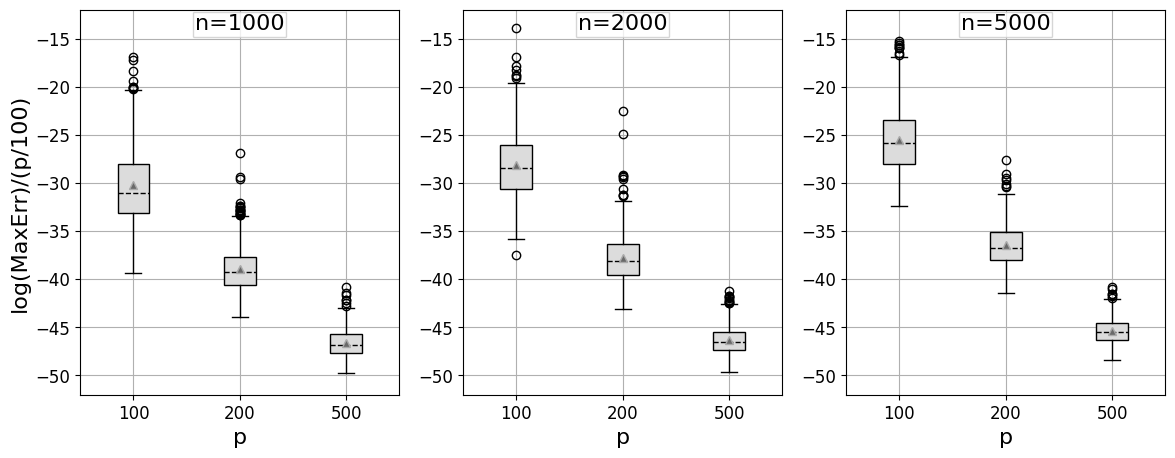

In [17]:
# Plot
plt.figure(figsize=(14,5))
plt.subplot(131)#p100
ddp = np.array([np.log(RMax_Err_pi_1000_100).tolist(),(np.log(RMax_Err_pi_1000_200)/2).tolist(),
               (np.log(RMax_Err_pi_1000_500)/5).tolist()])
dfp = pd.DataFrame(ddp.T,columns=['100','200','500'])
plt.legend(loc=9,title=('n=1000'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.xlabel('p',fontsize=16)
plt.ylim(-52, -12)
plt.ylabel('log(MaxErr)/(p/100)',fontsize=16)
plt.xticks(fontsize=12)
fg = dfp.boxplot(sym = 'o',            
               vert = True,          
               patch_artist = True,  
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True, 
               notch = False,   
               return_type='dict') 
plt.grid(True) 
plt.yticks(fontsize=12)

plt.subplot(132)
ddg = np.array([np.log(RMax_Err_pi_2000_100).tolist(),(np.log(RMax_Err_pi_2000_200)/2).tolist(),
               (np.log(RMax_Err_pi_2000_500)/5).tolist()])
dfg = pd.DataFrame(ddg.T,columns=['100','200','500'])
plt.legend(loc=9,title=('n=2000'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.ylim(-52, -12)
plt.xlabel('p',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fg = dfg.boxplot(sym = 'o',            
               vert = True,         
               patch_artist = True, 
               meanline = False,showmeans = True, 
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True,  
               notch = False,    
               return_type='dict')  
plt.grid(True) 

plt.subplot(133)
dd = np.array([np.log(RMax_Err_pi_5000_100).tolist(),(np.log(RMax_Err_pi_5000_200)/2).tolist(),
               (np.log(RMax_Err_pi_5000_500)/5).tolist()])
df = pd.DataFrame(dd.T,columns=['100','200','500'])
plt.legend(loc=9,title=('n=5000'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.ylim(-52, -12)
plt.xlabel('p',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ft = df.boxplot(sym = 'o',            
               vert = True,         
               patch_artist = True,  
               meanline = False,showmeans = True,  
               showbox = True,  
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True,  
               notch = False,    
               return_type='dict') 
plt.grid(True)

plt.savefig("Results/0305membership.pdf")
plt.show()

## Final Estimator Results

In [18]:
# Load results
Omega_real_500_100 = pd.read_csv('../simulation/new_R500_final_n_little/Omega_real_500_100.csv')
Omega_real_1000_100 = pd.read_csv('../simulation/new_R500_final_n_little/Omega_real_1000_100.csv')
Omega_real_2000_100 = pd.read_csv('../simulation/new_R500_final_n_little/Omega_real_2000_100.csv')
Omega_ideal_500_100 = pd.read_csv('../simulation/new_R500_final_n_little/Omega_ideal_500_100.csv')
Omega_ideal_1000_100 = pd.read_csv('../simulation/new_R500_final_n_little/Omega_ideal_1000_100.csv')
Omega_ideal_2000_100 = pd.read_csv('../simulation/new_R500_final_n_little/Omega_ideal_2000_100.csv')

In [19]:
Omega_diff_500_100 = np.sum((Omega_real_500_100 - Omega_ideal_500_100)**2, axis=1)**0.5
Omega_diff_1000_100 = np.sum((Omega_real_1000_100 - Omega_ideal_1000_100)**2, axis=1)**0.5
Omega_diff_2000_100 = np.sum((Omega_real_2000_100 - Omega_ideal_2000_100)**2, axis=1)**0.5

/root/miniconda3/envs/myconda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


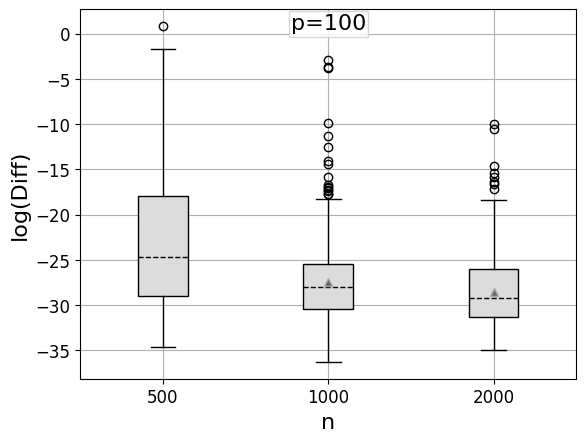

In [20]:
#Plot
ddp = np.array([np.log(Omega_diff_500_100).tolist(), np.log(Omega_diff_1000_100).tolist(),
               np.log(Omega_diff_2000_100).tolist()])
dfp = pd.DataFrame(ddp.T,columns=['500','1000','2000'])
plt.legend(loc=9,title=('p=100'), markerscale = 5, title_fontsize=16,fontsize=3)
plt.xlabel('n',fontsize=16)
plt.ylabel('log(Diff)',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fg = dfp.boxplot(sym = 'o',            
               vert = True,          
               patch_artist = True,  
               meanline = False,showmeans = True,  
               showbox = True,   
               boxprops = {'facecolor':'gainsboro'},
               whiskerprops = {'color':'black'},
               medianprops = {'linestyle':'--','color':'black'},
               meanprops = {'markeredgecolor':'darkgrey','markerfacecolor':'dimgrey'},
               showfliers = True, 
               notch = False,    
               return_type='dict')  
plt.grid(True) 
plt.savefig("Results/0305Finaldiff.pdf")
plt.show()